In [ ]:
## 

In [2]:
import torch
import matplotlib.pyplot as plt
from models import g_step, MnistDGCCA
from dataset import get_mnist_dataset 
import numpy as np


train_set, train_classes = get_mnist_dataset(train=True)

train_views = list(train_set)



/scratch/sagar/Projects/learn/compressai/venv/lib/python3.6/site-packages/torch/nn/functional.py:3888: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "
/scratch/sagar/Projects/learn/compressai/venv/lib/python3.6/site-packages/torch/nn/functional.py:3826: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


In [2]:
dgcca = torch.load('trained_models/dgcca_mnist_ae1.model')
out = torch.stack(dgcca(train_views))
G = g_step(out.clone().detach())  

import numpy as np
from sklearn.manifold import TSNE

X = G[:10000].numpy()
X_embedded = TSNE(n_components=2).fit_transform(X)

fig, axes = plt.subplots(1,1)

axes.scatter(X_embedded[:1000,0], X_embedded[:1000,1], c=train_classes[:1000].numpy())
axes.set_title('t-SNE plot of latent representation G')

Text(0.5, 1.0, 't-SNE plot of latent representation G of MNIST dataset')

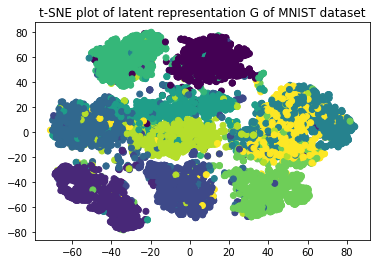

In [7]:
fig, axes = plt.subplots(1,1)

axes.scatter(X_embedded[:10000,0], X_embedded[:10000,1], c=train_classes[:10000].numpy())
axes.set_title('t-SNE plot of latent representation G of MNIST dataset')

In [8]:
fig.savefig('plt/MNISTae_tsne.pdf')

Text(0.5, 1.0, 't-SNE plot of latent representation G')

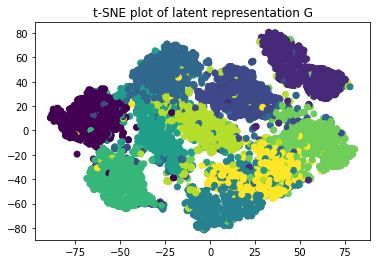

In [5]:
dgcca = torch.load('trained_models/dgcca_mnist_ae1_fed.model')
out = torch.stack(dgcca(train_views))
G = g_step(out.clone().detach())  

import numpy as np
from sklearn.manifold import TSNE

# a = out[0].clone().detach()
X = G[:10000].numpy()
X_embedded = TSNE(n_components=2).fit_transform(X)

fig, axes = plt.subplots(1,1)

axes.scatter(X_embedded[:10000,0], X_embedded[:10000,1], c=train_classes[:10000].numpy())
axes.set_title('t-SNE plot of latent representation G')

Text(0.5, 1.0, 't-SNE plot of latent representation G')

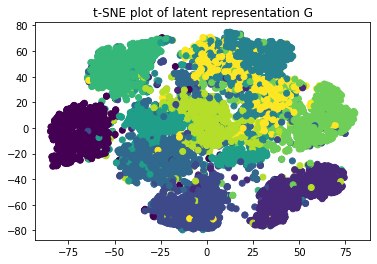

In [11]:
fig, axes = plt.subplots(1,1)

axes.scatter(X_embedded[:10000,0], X_embedded[:10000,1], c=train_classes[:10000].numpy())
axes.set_title('t-SNE plot of latent representation G')

In [12]:
fig.savefig('plt/mnistae_fed_tsne.pdf')